In [1]:
from cshd import params_phenometrics, cube_query, get_phenometrics

In [2]:
config = params_phenometrics(
    peak_metric='pos', 
    base_metric='vos', 
    method='seasonal_amplitude', 
    factor=0.2, 
    thresh_sides='two_sided', 
    abs_value=0.1
)

In [3]:
config

{'peak_metric': 'pos',
 'base_metric': 'vos',
 'method': 'seasonal_amplitude',
 'factor': 0.2,
 'thresh_sides': 'two_sided',
 'abs_value': 0.1,
 'format': None,
 'type': None}

In [4]:
S2_cube = cube_query(
    collection="S2-16D-2",
    start_date="2020-01-01",
    end_date="2020-12-31",
    freq='16D',
    bands=["NDVI"]
)

In [5]:
S2_cube

{'collection': 'S2-16D-2',
 'bands': ['NDVI'],
 'start_date': '2020-01-01',
 'end_date': '2020-12-31',
 'freq': '16D'}

In [6]:
ds_phenos = get_phenometrics(
    cube=S2_cube,
    geom=[dict(coordinates = [-52.4538803100586, -13.68668633547038 ])],
    engine='phenolopy',
    config=config
)

|====================================================================================================| 100%
https://brazildatacube.dpi.inpe.br/wtss/time_series?coverage=S2-16D-2&attributes=NDVI&start_date=2020-01-01&end_date=2020-12-31&latitude=-13.68668633547038&longitude=-52.4538803100586
Initialising calculation of phenometrics.

Beginning extraction of CRS metadata.
> Extracting CRS metadata.
> No CRS metadata found. Returning None.

Beginning calculation of phenometrics. This can take awhile - please wait.

Beginning calculation of peak of season (pos) values and times.
> Calculating peak of season (pos) values.
> Calculating peak of season (pos) times.
> Success!

Beginning calculation of valley of season (vos) values and times.
> Calculating valley of season (vos) values.
> Calculating valley of season (vos) times.
> Success!

Beginning calculation of middle of season (mos) values (times not possible).
> Calculating middle of season (mos) values.
> Success!

Beginning calculatio

In [7]:
ds_phenos 

{'phenometrics': {'sos_v': 3834.0,
  'sos_t': '2020-02-19T00:00:00',
  'pos_v': 8509.0,
  'pos_t': '2020-03-22T00:00:00',
  'vos_v': 2022.0,
  'vos_t': '2020-09-14T00:00:00',
  'eos_v': 3553.0,
  'eos_t': '2020-06-10T00:00:00'},
 'timeseries': {'attributes': [{'attribute': 'NDVI',
    'values': [3849.0,
     2329.0,
     4567.0,
     3834.0,
     6802.0,
     8509.0,
     8317.0,
     7564.0,
     4566.0,
     3612.0,
     3553.0,
     2493.0,
     2495.0,
     2358.0,
     2254.0,
     2144.0,
     2022.0,
     2103.0,
     2060.0,
     2610.0,
     4375.0,
     6136.0,
     6382.0]}],
  'timeline': ['2020-01-01T00:00:00',
   '2020-01-17T00:00:00',
   '2020-02-02T00:00:00',
   '2020-02-18T00:00:00',
   '2020-03-05T00:00:00',
   '2020-03-21T00:00:00',
   '2020-04-06T00:00:00',
   '2020-04-22T00:00:00',
   '2020-05-08T00:00:00',
   '2020-05-24T00:00:00',
   '2020-06-09T00:00:00',
   '2020-06-25T00:00:00',
   '2020-07-11T00:00:00',
   '2020-07-27T00:00:00',
   '2020-08-12T00:00:00',
   '

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy import interpolate

In [9]:
dates_datetime64 = pd.date_range(pd.to_datetime(S2_cube['start_date'], format='%Y-%m-%d'), periods=len(ds_phenos['timeseries']["timeline"]), freq="16D")

In [10]:
dates_datetime64_2 = pd.date_range(pd.to_datetime(S2_cube['start_date'], format='%Y-%m-%d'), periods=360, freq="1D")

# x_new, bspline, y_new
x_new = dates_datetime64_2
bspline = interpolate.make_interp_spline(dates_datetime64, ds_phenos['timeseries']['attributes'][0]['values'])
y_new = bspline(x_new)

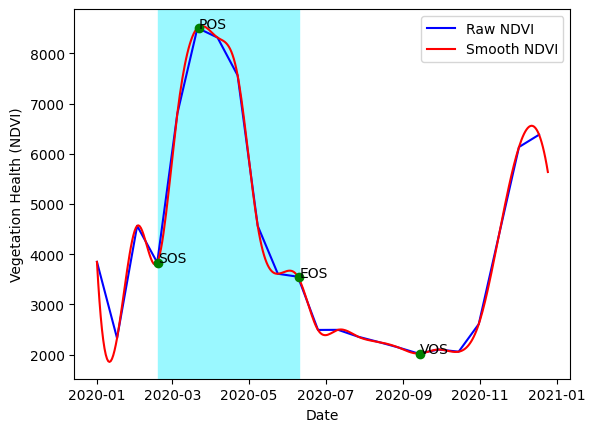

In [11]:
plt.plot(dates_datetime64, ds_phenos['timeseries']['attributes'][0]['values'], color='blue', label='Raw NDVI') 
plt.plot(x_new, y_new, color='red', label='Smooth NDVI') 

p = ds_phenos["phenometrics"]

sos_time = datetime.strptime(p['sos_t'], '%Y-%m-%dT00:00:00')
plt.plot(sos_time, p['sos_v'], 'go', label='_nolegend_')
plt.annotate('SOS', [sos_time, p['sos_v']])

eos_time = datetime.strptime(p['eos_t'], '%Y-%m-%dT00:00:00')
plt.plot(eos_time, p['eos_v'], 'go', label='_nolegend_')
plt.annotate('EOS', [eos_time, p['eos_v']])

pos_time = datetime.strptime(p['pos_t'], '%Y-%m-%dT00:00:00')
plt.plot(pos_time, p['pos_v'], 'go', label='_nolegend_')
plt.annotate('POS', [pos_time, p['pos_v']])

vos_time = datetime.strptime(p['vos_t'], '%Y-%m-%dT00:00:00')
plt.plot(vos_time, p['vos_v'], 'go', label='_nolegend_')
plt.annotate('VOS', [vos_time, p['vos_v']])

plt.axvspan(sos_time, eos_time, color='#9af8ff')

plt.ylabel('Vegetation Health (NDVI)')
plt.xlabel('Date')
plt.legend(loc="upper right")